In [ ]:
%load_ext autoreload
%autoreload 2

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import svm 
from sklearn import datasets
from sklearn.metrics import accuracy_score

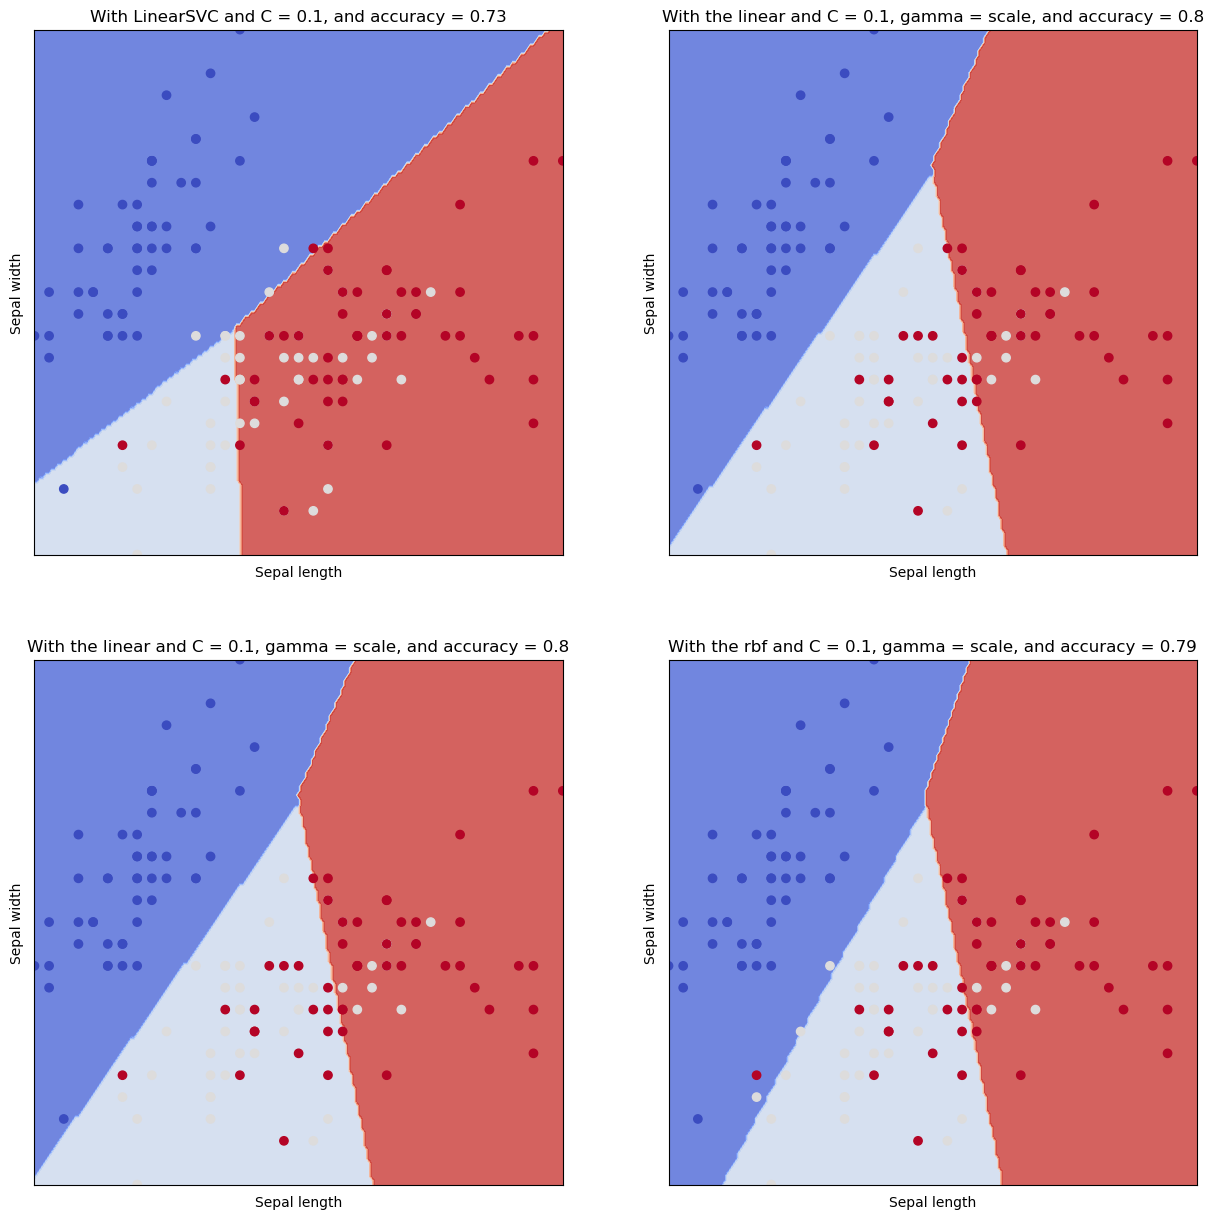

In [62]:
iris = datasets.load_iris()
y = iris.target
X = iris.data[:, :2]

C = 0.1

clf1 = svm.LinearSVC(C=C,max_iter=20000).fit(X, y)
clf2 = svm.SVC(kernel='linear', C=C).fit(X, y)
clf3 = svm.SVC(kernel='rbf', max_iter=10000000, C=C).fit(X, y)
# clf4 = svm.SVC(kernel='poly', degree=3, max_iter=10000000,C=C).fit(X, y)
clf5 = svm.SVC(kernel='sigmoid', max_iter=10000000,C=C).fit(X, y)

def mesh_pred(clf:list, ax : plt.axes or None = None): 
    """
    Plot the mesh prediction of multiple classifier

    Parameters
    ----------
    clf : list
        list of classifier. These classifier must be fit before.
    X_min_C1 : float or int
        minimum value of the first feature.
    X_max_C1 : float or int
        maximum value of the first feature.
    X_min_C2 : float or int
        minimum value of the second feature.
    X_max_C2 : float or int
        maximum value of the second feature.
    ax : plt.axes or None, optional
        axes to plot on, by default None

    Returns
    -------
    None.

    """
    X_min_C1, X_max_C1 = X[:, 0].min(), X[:, 0].max()
    X_min_C2, X_max_C2 = X[:, 1].min(), X[:, 1].max()

    h = 0.02

    xx, yy = np.meshgrid(np.arange(X_min_C1, X_max_C1, h),
                         np.arange(X_min_C2, X_max_C2, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())



predictor = [clf1, clf2, clf3, clf5]
fig,ax = plt.subplots(len(predictor)//2,len(predictor)//2,figsize=(15,15))
for i in range(len(predictor)//2):
    for j in range(len(predictor)//2):

        mesh_pred(predictor[i+j], ax = ax[i,j])
        accu = round(accuracy_score(y, predictor[i+j].predict(X)),2)
        try : 
            ax[i,j].set_title(f"With the {predictor[i+j].kernel} and C = {C}, gamma = {predictor[i+j].gamma}, and accuracy = {accu}")
        except :
            ax[i,j].set_title(f"With LinearSVC and C = {C}, and accuracy = {accu}")
        ax[i,j].set_xlabel("Sepal length")
        ax[i,j].set_ylabel("Sepal width")

plt.show()


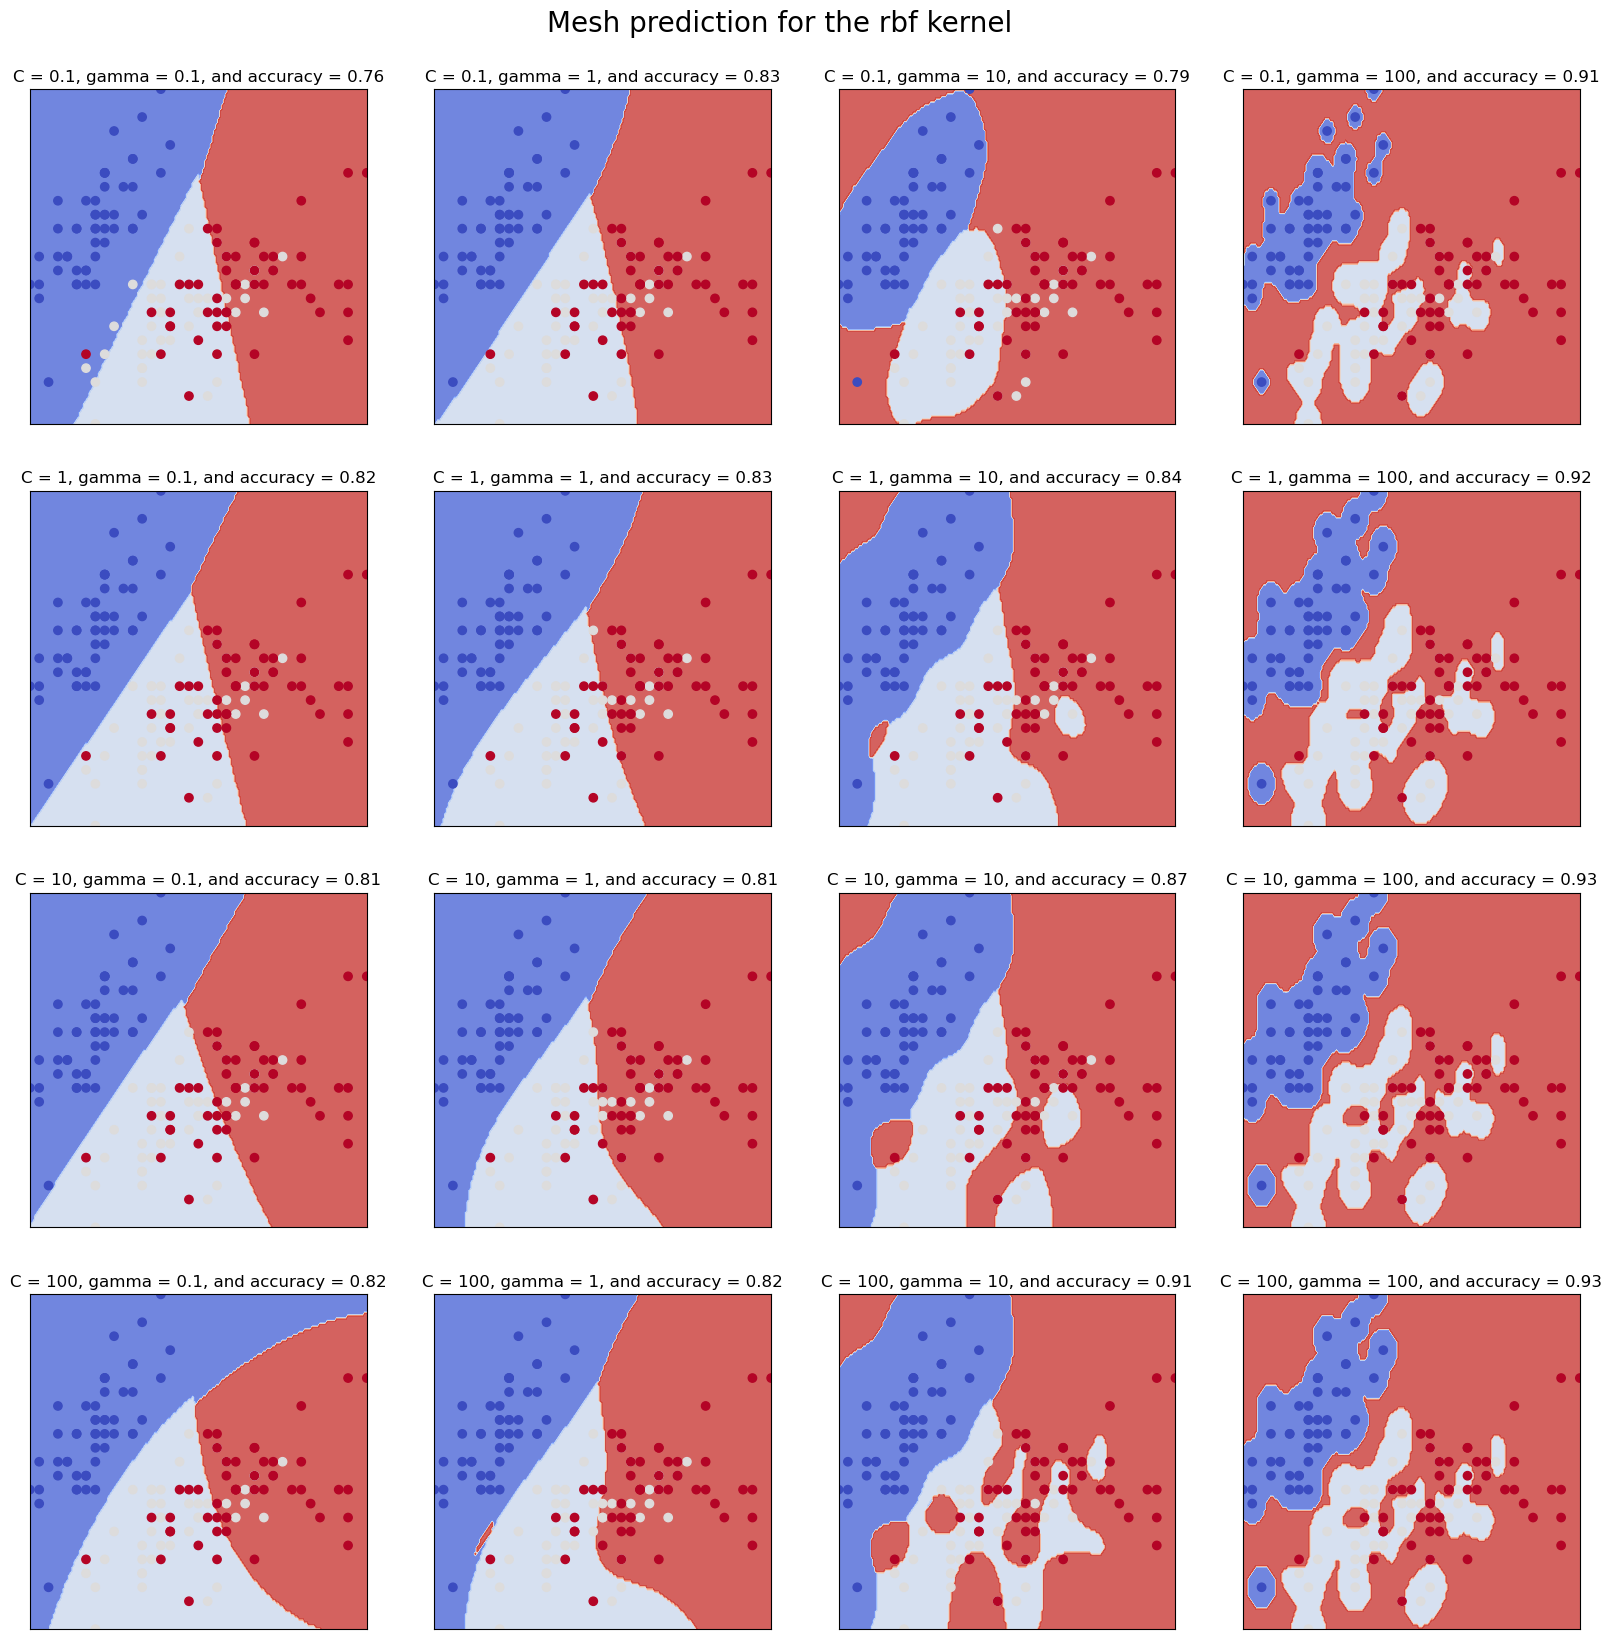

In [65]:
def mesh_pred_clf(X,Y,kernel = "linear" , **kwargs): 
    """
    Plot the mesh prediction with diffrent C and gamma parameters for a given kernel SVM classifier

    Parameters
    ----------
    X : np.array
        array of the features.
    Y : np.array
        array of the target.
    kernel : str, optional
        kernel of the SVM classifier, by default "linear"
        kernel must be in ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
    
    Returns
    -------
    None.
        Subplots of the mesh prediction of the SVM classifier for diffrent C and gamma parameters.
    
    """
    C = [0.1, 1, 10, 100]
    gamma = [0.1, 1, 10, 100]
    fig,ax = plt.subplots(len(C),len(gamma),figsize=(20,20))

    for i in range(len(C)):
        for j in range(len(gamma)):
            clf = svm.SVC(kernel=kernel, C=C[i], gamma=gamma[j], **kwargs).fit(X, Y)
            accu = round(accuracy_score(Y, clf.predict(X)),2)
            mesh_pred(clf, ax = ax[i,j])
            ax[i,j].set_title(f"C = {C[i]}, gamma = {gamma[j]}, and accuracy = {accu}")
    fig.suptitle(f"Mesh prediction for the {kernel} kernel",y=0.92,fontsize=20)
    plt.show()

mesh_pred_clf(X,y,kernel = "rbf", max_iter=10000000)
# mesh_pred_clf(X,y,kernel = "poly")
# mesh_pred_clf(X,y,kernel = "sigmoid")

## Test 3D

ValueError: X has 2 features, but SVC is expecting 3 features as input.

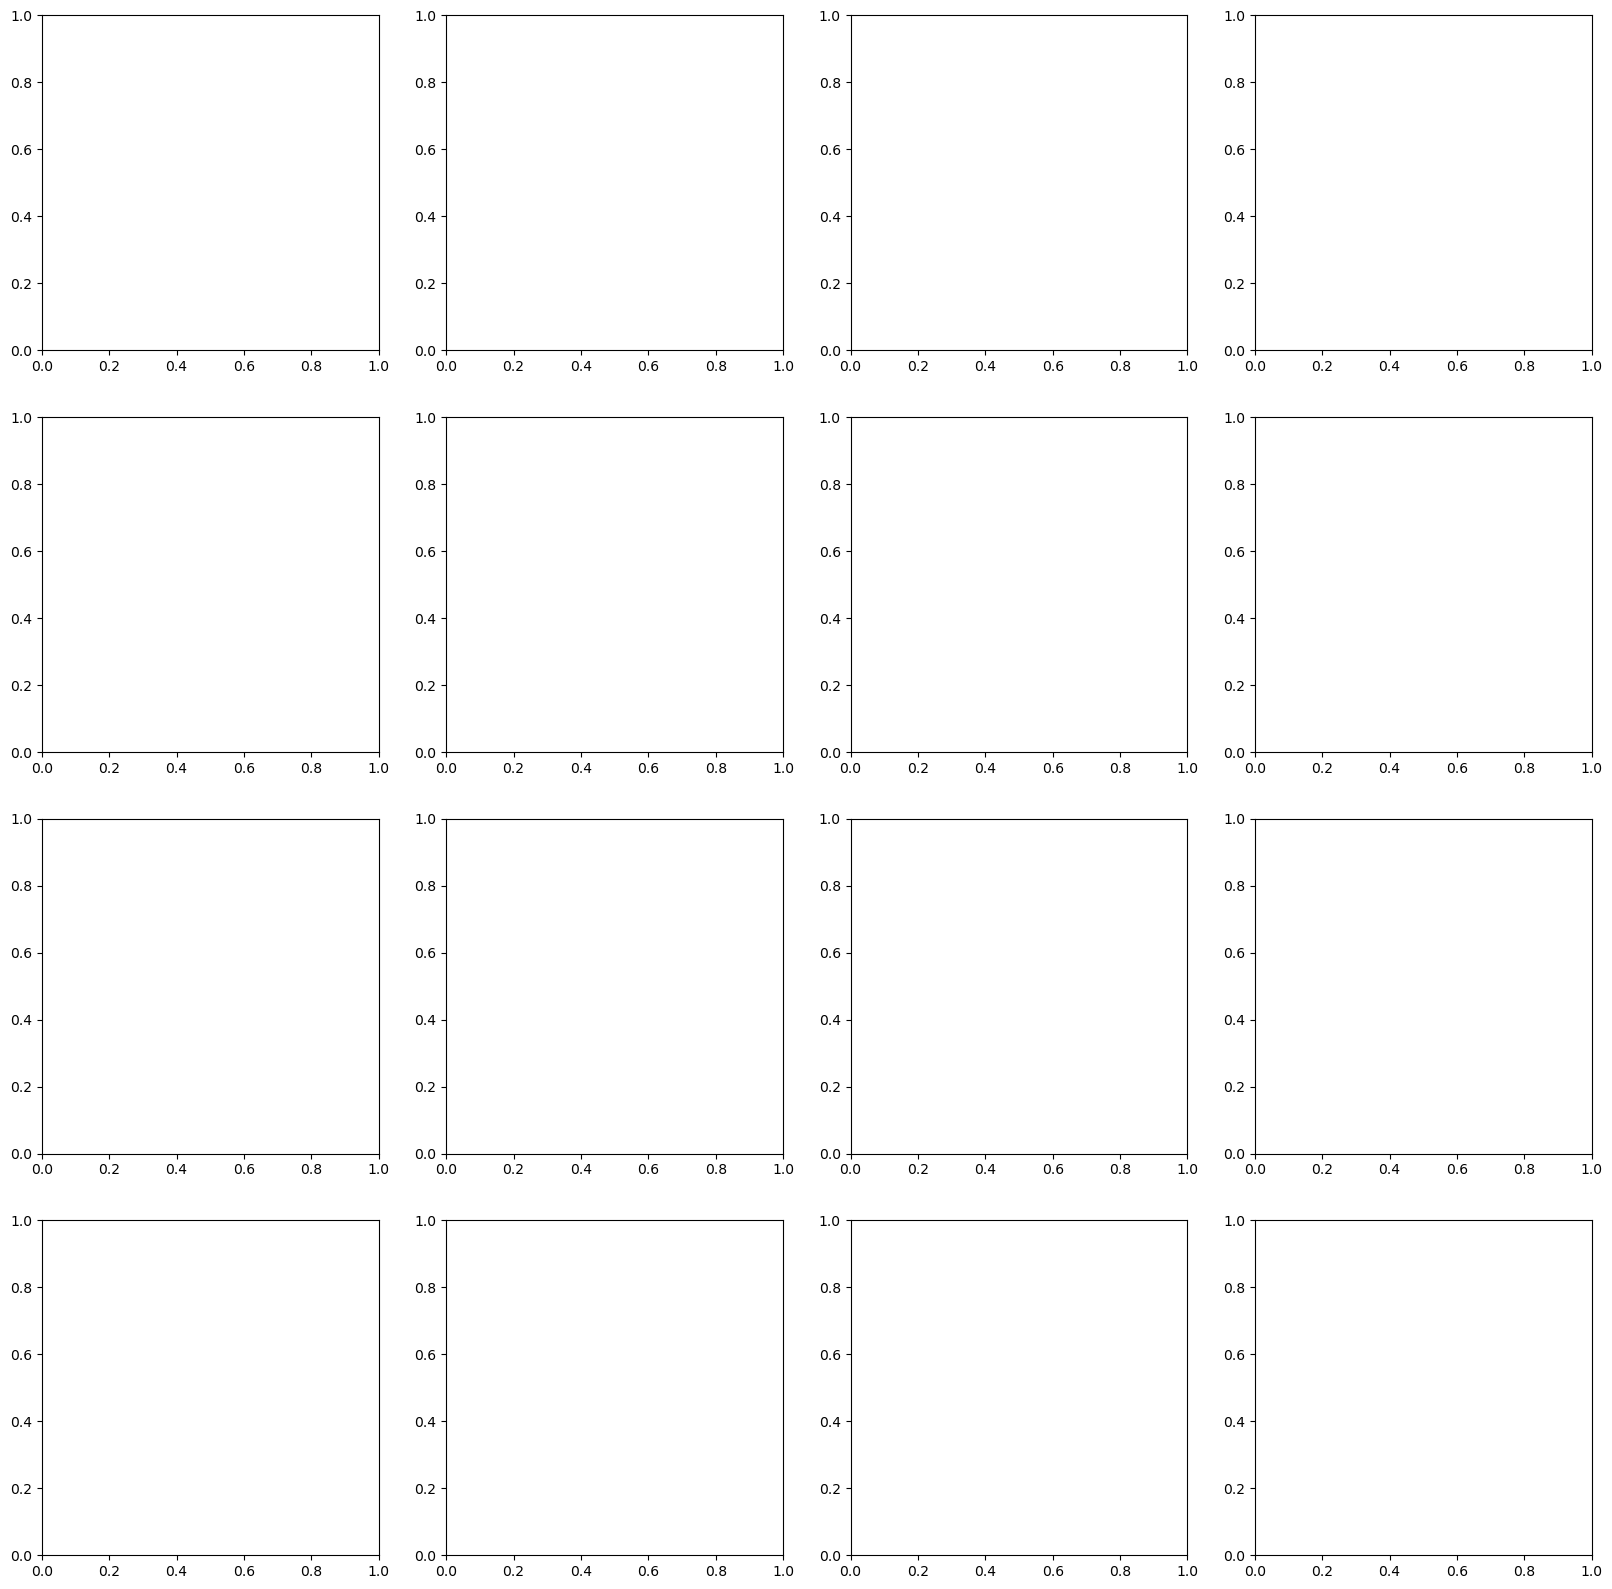

In [80]:
iris = datasets.load_iris()
y = iris.target
X = iris.data[:, :3]
mesh_pred_clf(X,y,kernel = "rbf", max_iter=10000000)